In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ahs = pd.read_feather('../../data/AHS_2023.feather')

Looking only at the most recent AHS PUF, let's look at the distributions of rooms in rental apartments.

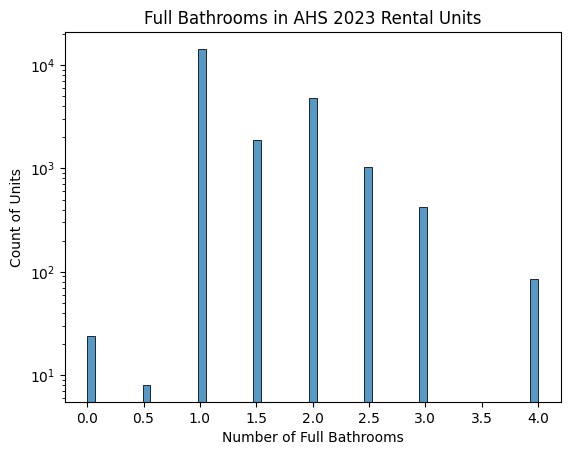

In [3]:
sns.histplot(data = ahs, x = "BATHROOMS")
plt.yscale('log')
plt.xlabel("Number of Full Bathrooms")
plt.ylabel("Count of Units")
plt.title("Full Bathrooms in AHS 2023 Rental Units")
plt.show()

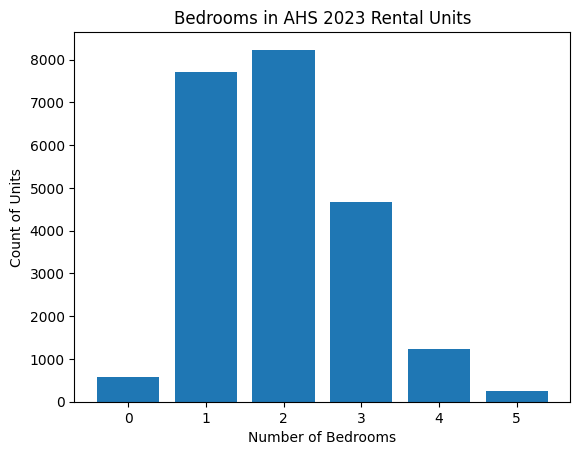

In [4]:
labs, counts = np.unique(ahs["BEDROOMS"], return_counts=True)
plt.bar(labs, counts, align='center')
plt.gca().set_xticks(labs)
#plt.yscale('log')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count of Units")
plt.title("Bedrooms in AHS 2023 Rental Units")
plt.show()

How about the rents?

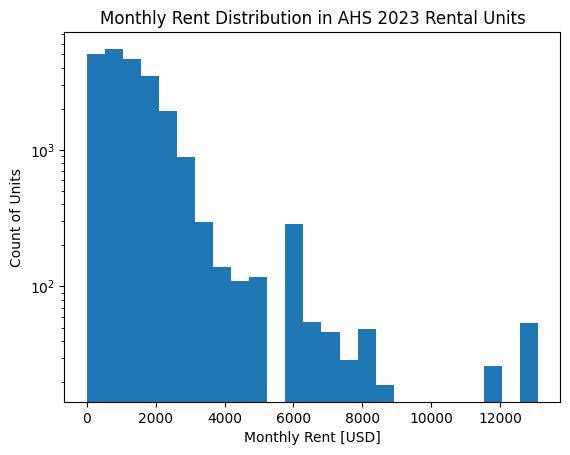

In [5]:
plt.hist(ahs["RENT"], bins = 25)
plt.yscale('log')
plt.xlabel('Monthly Rent [USD]')
plt.ylabel('Count of Units')
plt.title('Monthly Rent Distribution in AHS 2023 Rental Units')
plt.show()

Let's check for some correlations on price and some of the indicators.

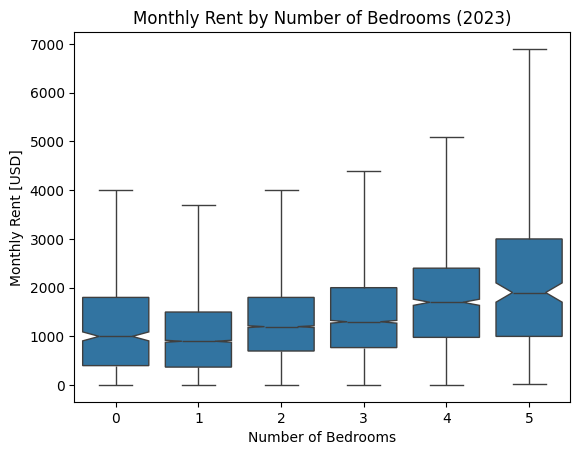

In [42]:
sns.boxplot(data = ahs, x = 'BEDROOMS', y = 'RENT', log_scale=False, notch=True, whis = 2.0, showfliers = False)
plt.title('Monthly Rent by Number of Bedrooms (2023)')
plt.ylabel('Monthly Rent [USD]')
plt.xlabel('Number of Bedrooms')
#plt.ylim(-100, 8100)
plt.show()

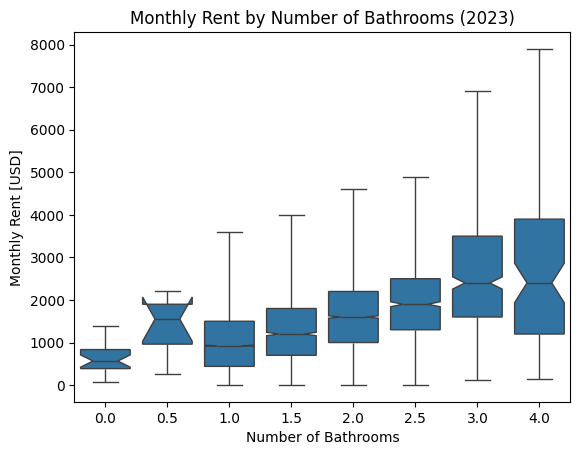

In [41]:
sns.boxplot(data = ahs, x = 'BATHROOMS', y = 'RENT', log_scale=False, notch=True, whis = 2.0, showfliers = False)
plt.title('Monthly Rent by Number of Bathrooms (2023)')
plt.ylabel('Monthly Rent [USD]')
plt.xlabel('Number of Bathrooms')
#plt.ylim(-100, 8100)
plt.show()

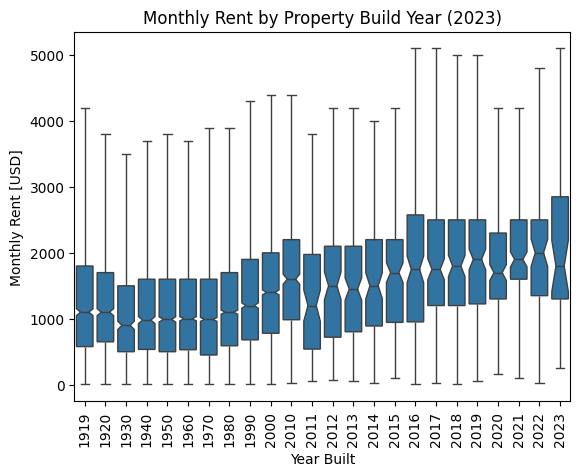

In [14]:
sns.boxplot(data = ahs, x = 'YRBUILT', y = 'RENT', notch=True, whis = 2.0, showfliers = False)
plt.xticks(rotation = 90)
plt.xlabel("Year Built")
plt.ylabel("Monthly Rent [USD]")
plt.title("Monthly Rent by Property Build Year (2023)")
plt.show()

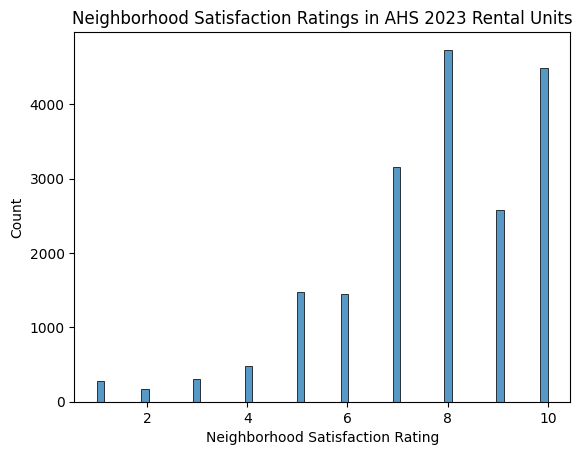

In [8]:
ratings = ahs[ahs['RATINGNH'] >= 0]['RATINGNH']
sns.histplot(ratings)
plt.xlabel('Neighborhood Satisfaction Rating')
plt.title('Neighborhood Satisfaction Ratings in AHS 2023 Rental Units')
plt.show()

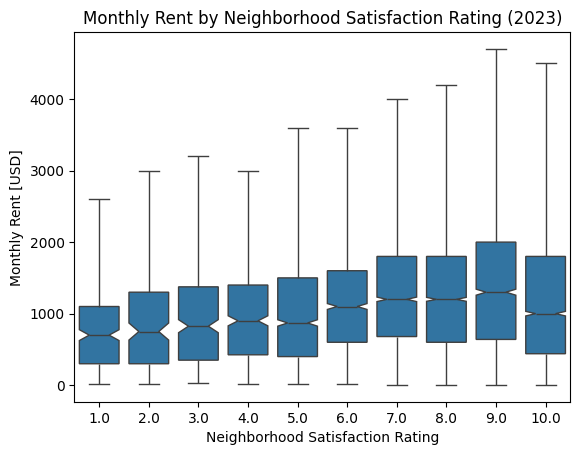

In [13]:
sns.boxplot(data = ahs[ahs['RATINGNH'] >= 0], x = 'RATINGNH', y = 'RENT', notch=True, whis = 2.0, showfliers = False)
plt.xlabel('Neighborhood Satisfaction Rating')
plt.ylabel('Monthly Rent [USD]')
plt.title('Monthly Rent by Neighborhood Satisfaction Rating (2023)')
plt.show()

In [16]:
metro_fmr = pd.read_csv('../../data/fmr_metro_data.csv')
metro_fmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              5402 non-null   int64 
 1   metro_name        5402 non-null   object
 2   code              5402 non-null   object
 3   Efficiency        5402 non-null   int64 
 4   One-Bedroom       5402 non-null   int64 
 5   Two-Bedroom       5402 non-null   int64 
 6   Three-Bedroom     5402 non-null   int64 
 7   Four-Bedroom      5402 non-null   int64 
 8   FMR Percentile    5402 non-null   int64 
 9   statename         5402 non-null   object
 10  statecode         5402 non-null   object
 11  smallarea_status  5402 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 506.6+ KB


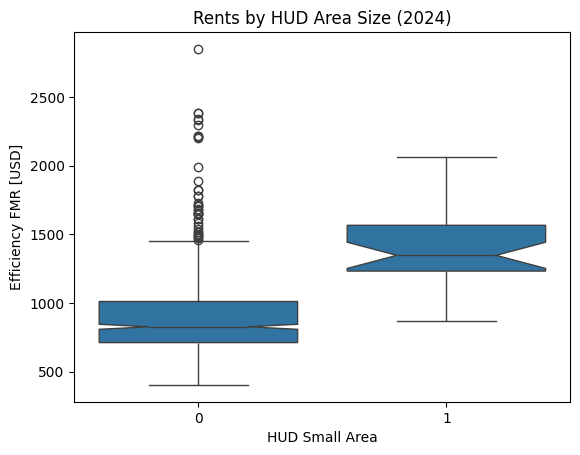

In [22]:
sns.boxplot(data = metro_fmr[metro_fmr['Year'] == 2024], x = 'smallarea_status', y = 'Efficiency', notch = True)
plt.xlabel("HUD Small Area")
plt.ylabel("Efficiency FMR [USD]")
plt.title("Rents by HUD Area Size (2024)")
plt.show()

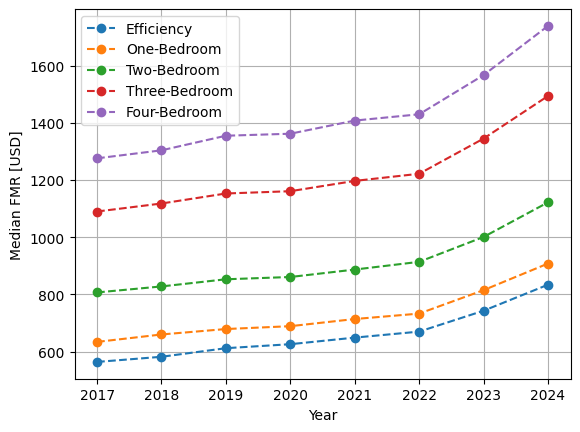

In [37]:
dat = metro_fmr.iloc[:, [0,3,4,5,6,7]]
dat.groupby('Year').median().reset_index().plot(
    x = 'Year',
    marker = 'o',
    linestyle = '--',
    grid = True,
)
plt.ylabel('Median FMR [USD]')
plt.show()